В данном материале разберёмся с тем, как строить рекомендательные системы на основе сингулярного разложения матриц. 

Начнём с постановки задачи. Что такое вообще рекомендательная система? Это алгоритм, который предлагает нашим пользователям/клиентам товары/контент с целью увеличения счастья пользователя или выручки.
Подходы к построению таких систем могут быть разными:

- Рекомендовать самые популярные товары/фильмы/новости/музыку;
- Коллаборативная фильтрация на основе user-based/item-based (метрические методы);
- Рекомендации на основе факторизации матриц(SVD-разложение);
- Можно обучить регрессор, предсказывающий выручку или рейтинг фильма для пары "Пользователь-Объект";

Я же подробно остановлюсь на третьем пункте, т.к. этот метод построения рекомендательных систем достаточно неплох: быстро работает и показывает неплохое качество рекомендаций, выявляя скрытые интересы пользователей и качества объектов (фильм, товар и т.п.).

Представим, что у нас есть небольшой онлайн-кинотеатр и мы хотим, чтобы пользователи были довольны и смотрели фильмы у нас, а не на других ресурсах. Создадим небольшую матрицу рейтингов наших фильмов, на основании оценок пользователей.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Названия фильмов
f = ['Терминатор', 'Робокоп', 'Рэмбо', 'Джеймс Бонд','Властелин Колец', 'Хоббит', 'Гарри Поттер', 
     'Американский Пирог', 'Мальчишник в Вегасе', 'Мстители', 'Супермен'] 

In [3]:
#Наши пользователи
u = ['Вася','Петя','Саша','Женя','Маша','Оля','Лена','Ваня','Ира']

In [4]:
#Рейтинг фильмов от пользователей. 0 - значит фильм не был просмотрен.
fu = np.array([[9,0,0,6,4,3,5,7,8,6,5],
              [0,0,0,8,10,0,8,5,6,2,0],
              [8,0,5,7,4,0,5,7,8,8,5],
              [5,2,0,4,10,0,9,5,0,0,0],
              [0,0,2,5,7,0,0,9,0,4,0],
              [2,3,0,0,0,7,9,0,5,0,3],
              [5,0,3,8,8,0,0,7,0,2,4],
              [8,7,0,6,5,4,0,8,0,10,0],
              [0,0,2,5,10,0,0,0,9,0,3]])

In [5]:
#Сделаем датафрейм из f,u и fu.
R = pd.DataFrame(fu,u,f)

In [6]:
R

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,9,0,0,6,4,3,5,7,8,6,5
Петя,0,0,0,8,10,0,8,5,6,2,0
Саша,8,0,5,7,4,0,5,7,8,8,5
Женя,5,2,0,4,10,0,9,5,0,0,0
Маша,0,0,2,5,7,0,0,9,0,4,0
Оля,2,3,0,0,0,7,9,0,5,0,3
Лена,5,0,3,8,8,0,0,7,0,2,4
Ваня,8,7,0,6,5,4,0,8,0,10,0
Ира,0,0,2,5,10,0,0,0,9,0,3


Вот теперь и встаёт вопрос, какой предложить фильм, чтобы наш пользователь хорошо провёл вечер? Немного поискав на просторах интернета, находим статью о том, что один большой онлнайн-кинотеатр **Netflix** в 2006 году объявил соревнование по разработке рекомендательной системы фильмов. За решение, которое улучшит качество рекомендаций на 10%, была объявлена награда в 1 млн долларов. В итоге в 2011 году такое решение было получено, а работало оно на основе **SVD** - Singular Value Decomposition или Сингулярном Разложении Матриц, если по-русски.

### Немного линейной алгебры.
Смысл SVD состоит в том, что прямоугольную матрицу A мы можем разложить на 3 матрицы: U, Ʃ и V.

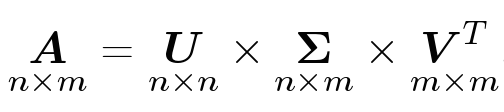

Матрицы U и V ортогональные, а Ʃ — диагональная (хотя и не квадратная). 

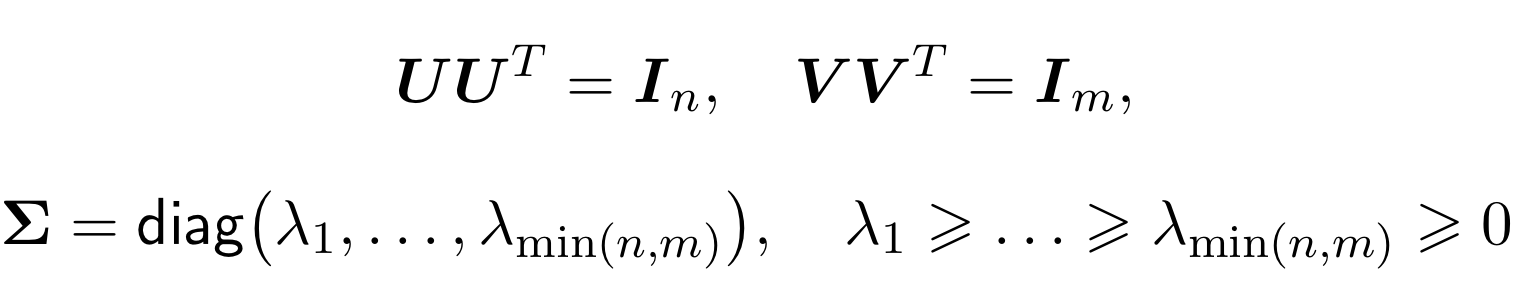

В случае разреженной матрицы, которой обычно является рейтинг фильмов, можно использовать усечённое разложение (truncated SVD), где мы оставляем только d первых чисел $\lambda$. В итоге получаем разложение матрицы A', которое хорошо приближает исходную матрицу A.

Теперь применим это к нашей рекомендательной системе. У нас есть матрица оценок R, давайте сделаем её сингулярное разложение.
Первые две матрицы перемножим, получим также матрицу $n$ x $d$, в итоге получится такое разложение.

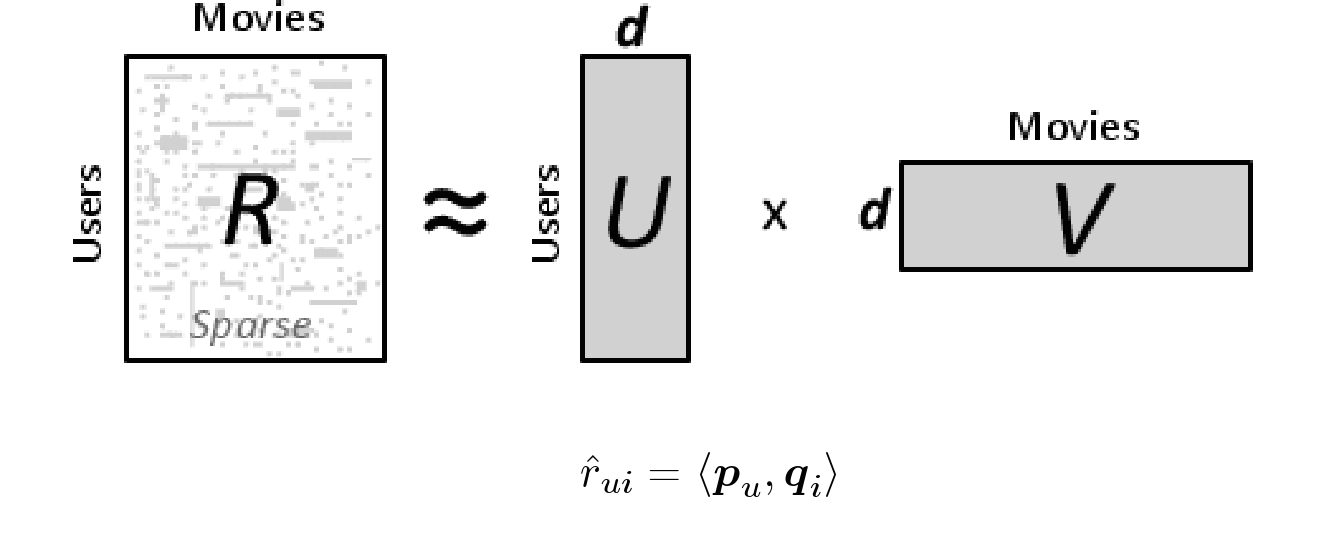

Размерность **d** в данном случае отвечает за количество скрытых свойств/интересов у наших пользователей и фильмов, $\hat r \tiny ui$ - рейтинг фильма, который мы получили перемножив матрицы **U** и **V**.

Таким образом, мы научились приближать исходную матрицу оценок матрицей, полученной на основе перемножения двух матриц, отвечающих за интересы пользователей и свойства фильмов. Но проблема в том, что матрица **R** у нас разреженная, и мы бы хотели бы как раз заполнить пустые (нулевые) элементы оценками пользователей.


Как же это сделать? Для этого нам нужно приблизить уже имеющиеся оценки числами, полученными в результате перемножения матриц $U$ и $V$. Тогда мы получим и оценки для нулей нашей исходной матрицы, т.е. нужно минимизировать такую функцию:

$$\large \frac{1}{n}\Sigma_{ui} (r {\tiny ui}-\hat r {\tiny ui})^{2} \to min,$$ где суммирование идёт по ненулевым индексам $u,i$ нашей исходной матрицы оценок, а $n$ - количество оценок в матрице.

Так это же задача регрессии с квадратичной функций потерь **MSE**. **MSE** выбрана по двум причинам: историческая, Netflix предложили метрику **RMSE** и она лучше оптимизируется градиентным спуском.

Функция потерь есть, метод оптимизации выбран, что забыли? Регуляризатор! Воспользуемся $L{\tiny 2}$-регуляризацией: 
$\large \lambda(\Sigma_{u}p {\tiny u}^{2} + \Sigma_{i}q {\tiny i}^{2})$
Осталось посчитать градиенты для реализации поиска минимума **MSE**. Воспользуемся стохастическим градиентным спуском, поэтому будем считать градиенты на одном объекте $\large r {\tiny ui}$ из матрицы оценок. В итоге получаем такие правила обновления элементов наших матриц **U** и **V**.

$\large 
{p_{u,j}=p_{u,j} + \large \gamma (r_{ui}-\hat r_{ui}) q_{i,j} - \lambda p_{u,j}}$


$\large {q_{i,j}=q_{i,j} + \large \gamma (r_{ui}-\hat r_{ui}) p_{u,j} - \lambda q_{i,j}}$

Индексы $u,i$ - номера пользователя и фильма в наших матрицах **U** (номер строки) и **V** (номер столбца), $j$ - $j$-ая компонента векторов $\large p_{u}$ и $\large q_{i}$.

Ну что же, теперь воспользуемся Питоном и сделаем рекомендации для наших пользователей!

In [11]:
def SVD(R,d,step,lambda_reg,n_iters):
    #инициализуем наши матрицы для разложения
    U = np.zeros((R.shape[0],d))
    V = np.zeros((d,R.shape[1]))
    #начальные элементы матрица U и V будут средним рейтингом по ненулевым оценкам
    mu = R.sum()/(R!=0).sum()
    non_zero = (R!=0).sum()
    U = U + mu
    V = V + mu
    # Создадим списки, где будут индексы нулевых и ненулевых элементов матрицы R
    indx=[]
    zero_indx = []
    # Инициализируем MSE в начале и будем отслеживать в процессе обучения
    MSE_start = 0
    MSE=[]
    # Найдём индексы нулевых и ненулевых элементов
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R[i][j]>0:
                indx.append([i,j])
                MSE_start+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2) / non_zero
            else:
                zero_indx.append([i,j])
    # Сделаем градиентный спуск            
    for n in range(n_iters):
        choice = np.random.randint(0,len(indx))
        ij = indx[choice]
        for k in range(0,d):
            U[ij[0],k] = U[ij[0],k] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * V[k,ij[1]] - 
                                              lambda_reg * U[ij[0],k])
            V[k,ij[1]] = V[k,ij[1]] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * U[ij[0],k] - 
                                              lambda_reg * V[k,ij[1]])
            
        L=0
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i,j]>0:
                    L+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2)/non_zero
        MSE.append(L)    
    return U,V, MSE_start, MSE

In [12]:
A,B,M_1,M_end = SVD(R.values,2,0.01,0.1,3000)

In [13]:
A

array([[ 0.38139766,  0.93272806],
       [-1.22398211,  2.51705704],
       [ 0.49577715,  0.90724636],
       [-1.39148216,  2.44036874],
       [-0.53408801,  1.99241596],
       [-0.32094884,  1.63193917],
       [-0.77767332,  2.17749899],
       [ 0.44818612,  1.05150849],
       [-1.06928901,  2.48454004]])

In [14]:
B

array([[ 3.75776125,  4.71226467,  4.58046368,  3.40277526, -0.09161057,
         4.16591291,  3.29982048,  3.51406203,  4.54222998,  5.25495607,
         4.58468052],
       [ 3.79825564,  3.19310817,  2.67059068,  3.8172642 ,  3.74501621,
         3.86863079,  4.90291031,  4.10688428,  4.83115633,  3.40054767,
         3.10747759]])

In [15]:
r_cap = np.zeros((R.shape[0],R.shape[1]))
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        r_cap[i,j]=np.dot(A[i,:],B[:,j])

In [16]:
R

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,9,0,0,6,4,3,5,7,8,6,5
Петя,0,0,0,8,10,0,8,5,6,2,0
Саша,8,0,5,7,4,0,5,7,8,8,5
Женя,5,2,0,4,10,0,9,5,0,0,0
Маша,0,0,2,5,7,0,0,9,0,4,0
Оля,2,3,0,0,0,7,9,0,5,0,3
Лена,5,0,3,8,8,0,0,7,0,2,4
Ваня,8,7,0,6,5,4,0,8,0,10,0
Ира,0,0,2,5,10,0,0,0,9,0,3


In [17]:
R_cap = pd.DataFrame(r_cap,u,f)

In [18]:
R_cap

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,4.975941,4.775548,4.237913,4.858280,3.458142,5.197250,5.831626,5.170861,6.238551,5.176014,4.647018
Петя,4.960994,2.269508,1.115623,5.443336,9.538549,4.638562,8.301984,6.036113,6.600688,2.127400,2.210131
Саша,5.308966,5.233169,4.693773,5.150217,3.352234,5.575166,6.084123,5.468147,6.634983,5.690422,5.092228
Женя,4.040287,1.235329,0.143593,4.580631,9.266695,3.644092,7.373268,5.132557,5.469371,0.986413,1.203890
Маша,5.560730,3.845236,2.874557,5.788197,7.510558,5.482958,8.006242,6.305803,7.199722,3.968696,3.742765
Оля,4.992473,3.698562,2.888147,5.137426,6.141041,4.976325,6.942178,5.574351,6.426330,3.862915,3.599766
Лена,5.348387,3.288387,2.253104,5.665841,8.226012,5.184220,8.109900,6.209944,6.987467,3.318050,3.201146
Ваня,5.678074,5.469552,4.861049,5.538962,3.896858,5.935002,6.634386,5.893378,7.115766,5.930903,5.322329
Ира,5.418785,2.894632,1.737350,5.845596,9.402601,5.157203,8.653015,6.446171,7.146245,2.829730,2.818304


In [30]:
print ('Start MSE:',M_1,'Finish MSE:',M_end[-1])

Start MSE: 4065.7950666666675 Finish MSE: 2.376110174938695


In [31]:
print ('Start RMSE',np.sqrt(M_1),'Finish RMSE',np.sqrt(M_end[-1]))

Start RMSE 63.76358731020917 Finish RMSE 1.5414636469728031


In [20]:
n = (R.values != 0).sum()

In [21]:
L=0
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R.values[i,j]>0:
            L+=((R.values[i,j]-R_cap.values[i,j]) ** 2)/n

В итоге получили матрицу оценок с помощью SGD. Как видно, MSE сильно упал. Можно поиграться с параметрами, чтобы настроить качество. Как итог, выбираем фильмы с наибольшей оценкой и рекомендуем их пользователям! :) 

В заключение хочется сказать, что есть хорошая библиотека Surprise, где можно делать рекомендации проще, быстрее и различными способами.
Оставлю ссылку для ознакомления http://surpriselib.com/